In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [38]:
dataset = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [40]:
dataset.describe(include='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count     91     1460        1460      1460      1460      1460         1460   
unique     2        4           4         2         5         3           25   
top     Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq      50      925        1311      1459      1052      1382          225   
mean     NaN      NaN         NaN       NaN       NaN       NaN          NaN   
std      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
min      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
25%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
50%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
75%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
max      NaN      NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460  1460.000000  1460.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.099315     5.575342   
std           NaN        NaN      NaN        NaN     1.382997     1.112799   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1460.000000   1460.000000      1460     1460        1460        1460   
unique          NaN           NaN         6        8          15          16   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN      1141     1434         515         504   
mean    1971.267808   1984.865753       NaN      NaN         NaN         NaN   
std       30.202904     20.645407       NaN      NaN         NaN         NaN   
min     1872.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1967.000000       NaN      NaN         NaN         NaN   
50%     1973.000000   1994.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1452  1452.000000      1460      1460       1460     1423   
unique          4          NaN         4         

In [41]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [42]:
dataset.shape

(1460, 81)

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

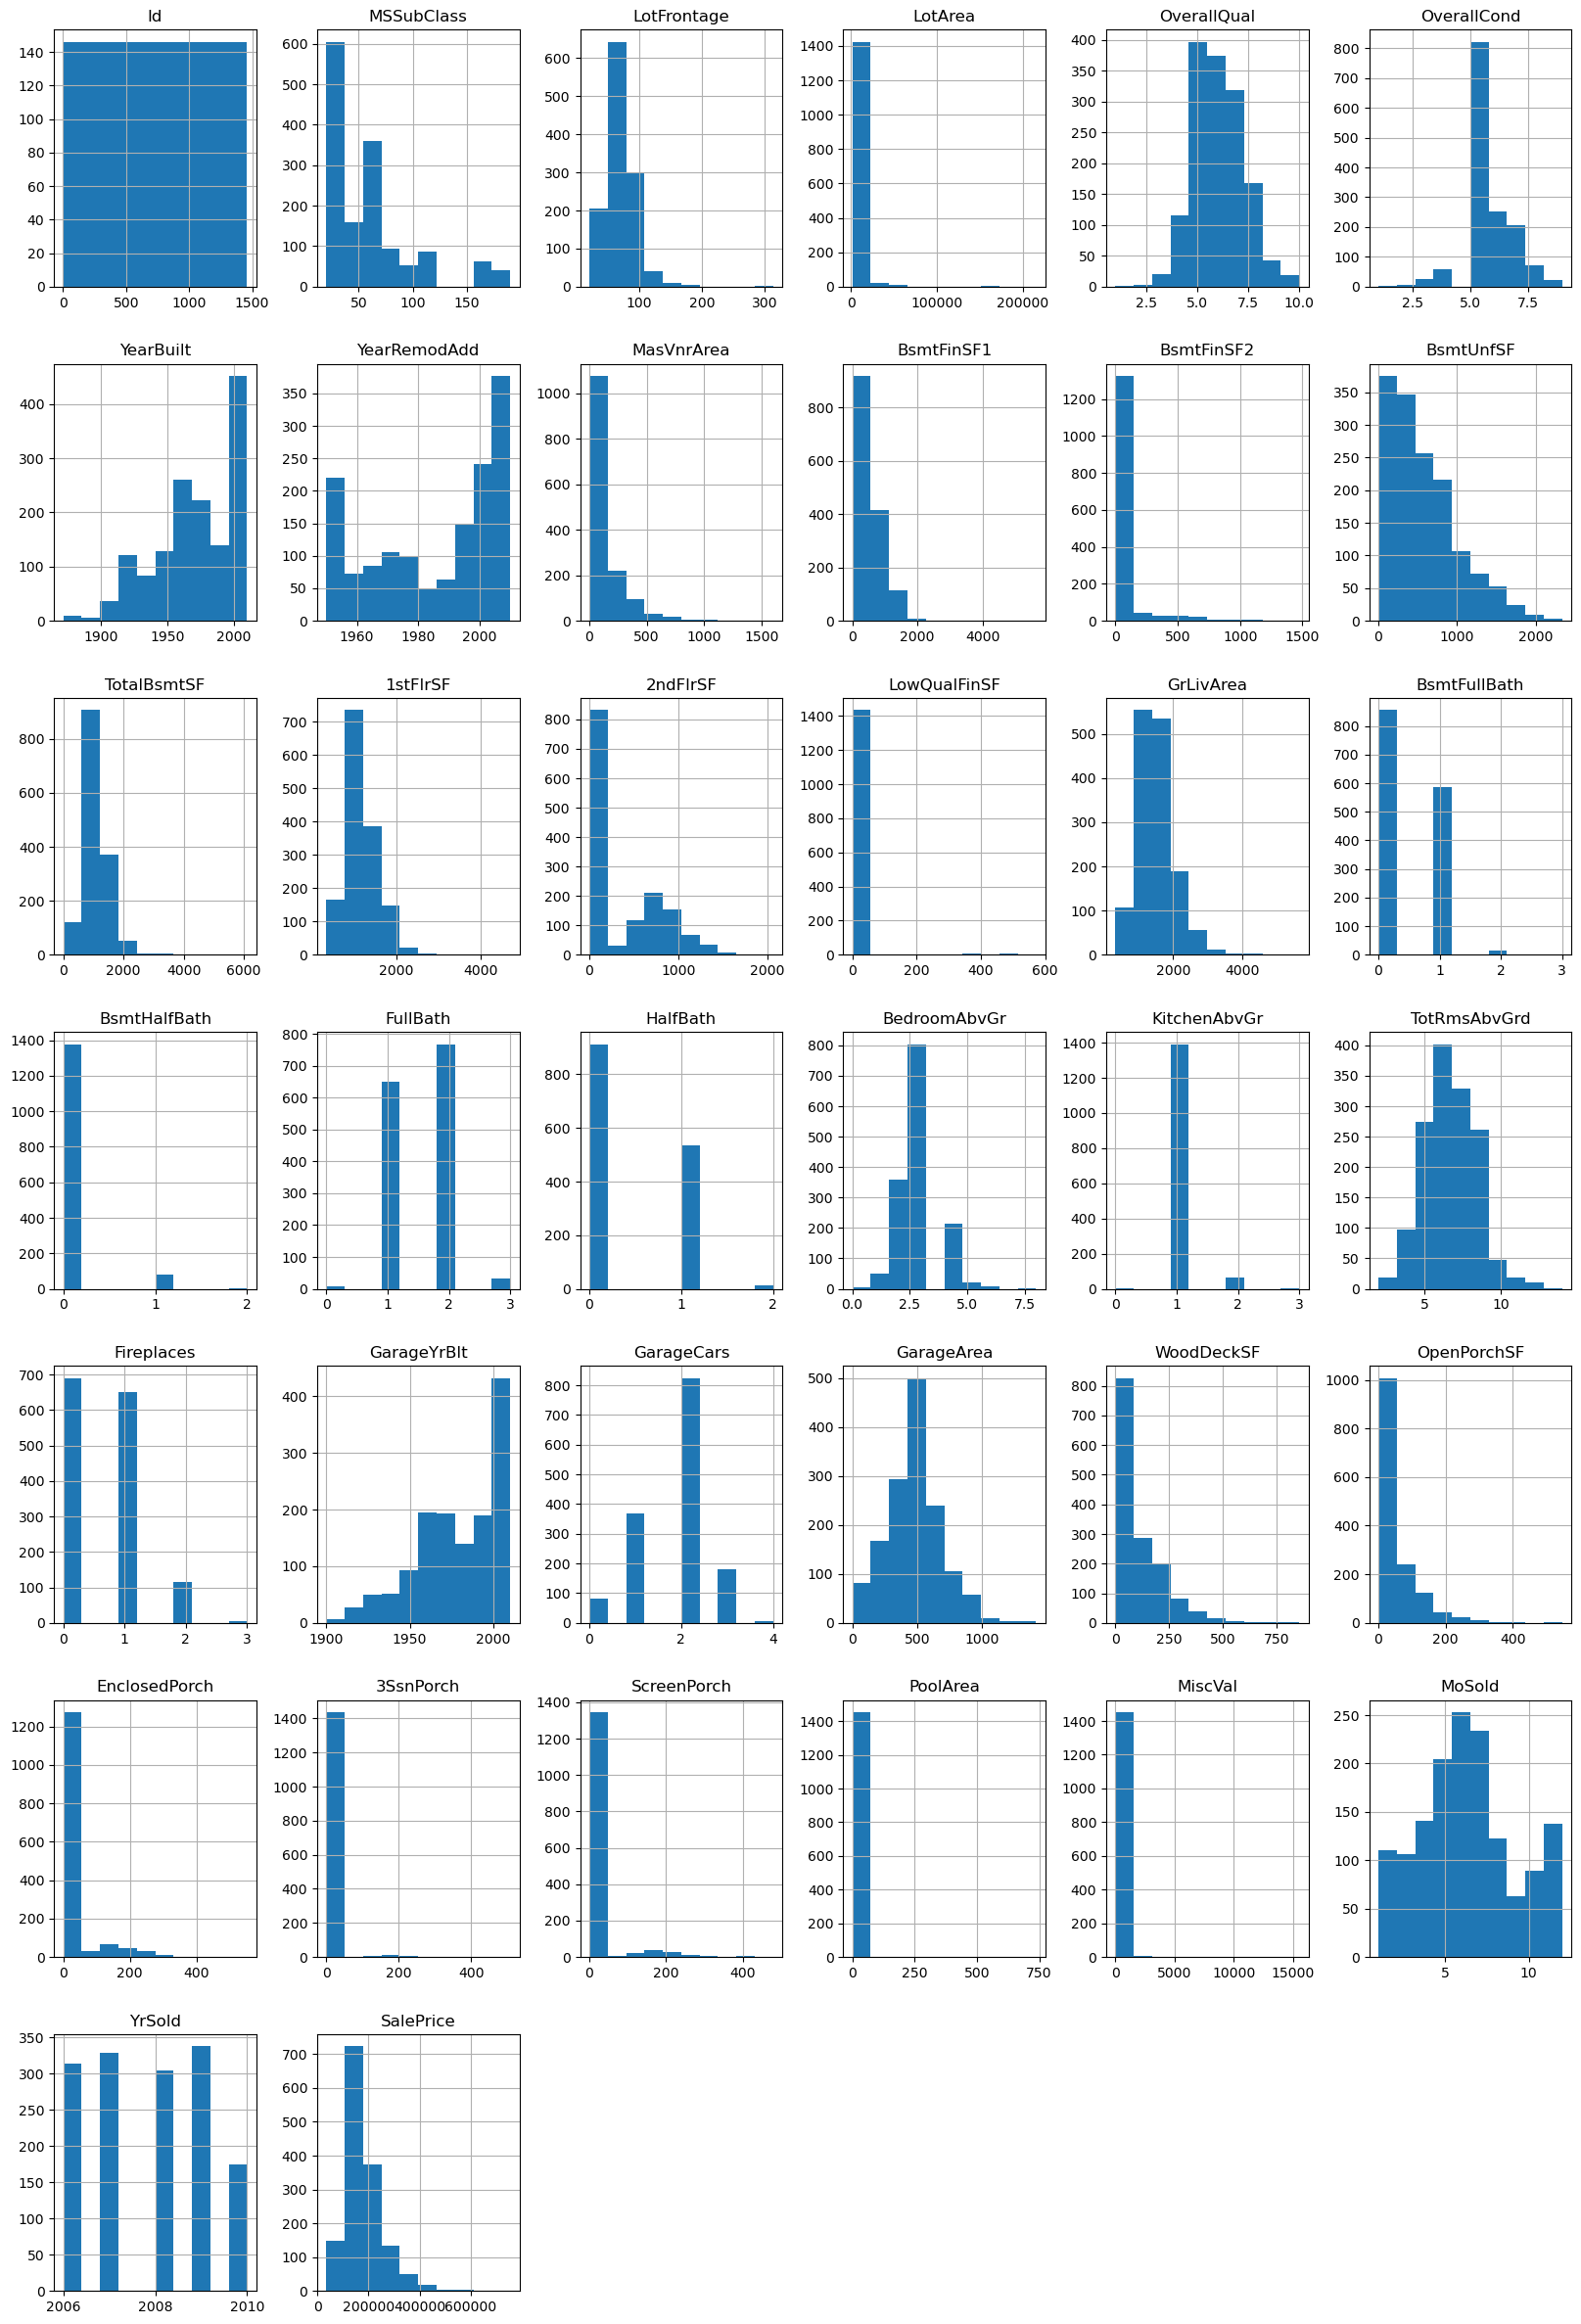

In [43]:
dataset.hist(figsize=(20,30))

In [44]:
corelation = dataset.corr()
corelation

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

In [45]:
dataset.isnull().sum().sort_values()

Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
BsmtUnfSF           0
3SsnPorch           0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageArea          0
GarageCars          0
Fireplaces          0
EnclosedPorch       0
BsmtFinSF2          0
HeatingQC           0
SalePrice           0
LandSlope           0
LandContour         0
LotShape            0
Neighborhood        0
Condition1          0
Street              0
LotArea             0
MSZoning            0
BsmtFinSF1          0
Condition2

In [46]:
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].mean())

In [47]:
dataset.drop(['Alley'], axis=1, inplace=True)
dataset.drop(['Fence'], axis=1, inplace=True)
dataset.drop(['MiscFeature'], axis=1, inplace=True)
dataset.drop(['PoolQC'], axis=1, inplace=True)

In [48]:
dataset['BsmtCond'] = dataset['BsmtCond'].fillna(dataset['BsmtCond'].mode()[0])
dataset['BsmtQual'] = dataset['BsmtQual'].fillna(dataset['BsmtQual'].mode()[0])

In [49]:
dataset['FireplaceQu'] = dataset['FireplaceQu'].fillna(dataset['FireplaceQu'].mode()[0])
dataset['GarageType'] = dataset['GarageType'].fillna(dataset['GarageType'].mode()[0])

In [50]:
dataset.drop(['GarageYrBlt'], axis=1, inplace=True)

In [51]:
dataset['GarageFinish'] = dataset['GarageFinish'].fillna(dataset['GarageFinish'].mode()[0])
dataset['GarageCond'] = dataset['GarageCond'].fillna(dataset['GarageCond'].mode()[0])
dataset['GarageQual'] = dataset['GarageQual'].fillna(dataset['GarageQual'].mode()[0])

In [52]:
dataset.isnull().sum().sort_values()

Id                0
Functional        0
TotRmsAbvGrd      0
KitchenQual       0
KitchenAbvGr      0
BedroomAbvGr      0
HalfBath          0
FullBath          0
BsmtHalfBath      0
BsmtFullBath      0
GrLivArea         0
LowQualFinSF      0
2ndFlrSF          0
1stFlrSF          0
CentralAir        0
HeatingQC         0
Fireplaces        0
Heating           0
FireplaceQu       0
GarageFinish      0
SaleType          0
YrSold            0
MoSold            0
MiscVal           0
PoolArea          0
ScreenPorch       0
3SsnPorch         0
EnclosedPorch     0
OpenPorchSF       0
WoodDeckSF        0
PavedDrive        0
GarageCond        0
GarageQual        0
GarageArea        0
GarageCars        0
GarageType        0
SaleCondition     0
TotalBsmtSF       0
BsmtFinSF2        0
HouseStyle        0
BldgType          0
Condition2        0
Condition1        0
Neighborhood      0
LandSlope         0
LotConfig         0
Utilities         0
LandContour       0
LotShape          0
Street            0


In [53]:
dataset['MasVnrType'] = dataset['MasVnrType'].fillna(dataset['MasVnrType'].mode()[0])
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].mode()[0])

In [54]:
dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna(dataset['BsmtExposure'].mode()[0])

In [55]:
dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna(dataset['BsmtFinType2'].mode()[0])

In [56]:
dataset.dropna(inplace=True)

In [57]:
dataset.shape

(1422, 76)

In [58]:
dataset.drop(['Id'], axis=1, inplace=True)

In [59]:
dataset.shape

(1422, 75)

In [60]:
int_cols = dataset.select_dtypes(include = 'int')

In [61]:
int_cols.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0          60     8450            7            5       2003          2003   
1          20     9600            6            8       1976          1976   
2          60    11250            7            5       2001          2002   
3          70     9550            7            5       1915          1970   
4          60    14260            8            5       2000          2000   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0         706           0        150          856       856       854   
1         978           0        284         1262      1262         0   
2         486           0        434          920       920       866   
3         216           0        540          756       961       756   
4         655           0        490         1145      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  \
0             3             1             8           0           2   
1             3             1             6           1           2   
2             3             1             6           1           2   
3             3             1             7           1           3   
4             4             1             9           1           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0         0        0       2    2008     208500  
1         0        0       5    2007     181500  
2         0        0       9    2008     223500  
3         0        0       2    2006     140000  
4         0        0      12    2008     250000

In [62]:
cat_cols = dataset.select_dtypes(include='object')

In [63]:
cat_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1459
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1422 non-null   object
 1   Street         1422 non-null   object
 2   LotShape       1422 non-null   object
 3   LandContour    1422 non-null   object
 4   Utilities      1422 non-null   object
 5   LotConfig      1422 non-null   object
 6   LandSlope      1422 non-null   object
 7   Neighborhood   1422 non-null   object
 8   Condition1     1422 non-null   object
 9   Condition2     1422 non-null   object
 10  BldgType       1422 non-null   object
 11  HouseStyle     1422 non-null   object
 12  RoofStyle      1422 non-null   object
 13  RoofMatl       1422 non-null   object
 14  Exterior1st    1422 non-null   object
 15  Exterior2nd    1422 non-null   object
 16  MasVnrType     1422 non-null   object
 17  ExterQual      1422 non-null   object
 18  ExterCond      1422 non-null

In [64]:
cat_cols.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ          Gd     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive SaleType SaleCondition  
0          RFn         TA         TA          Y       WD        Normal  
1          RFn         TA         TA          Y       WD        Normal  
2          RFn         TA         TA          Y       WD        Normal  
3          Unf         TA         TA          Y       WD       Abnorml  
4          RFn         TA         TA          Y       WD        Normal

In [65]:
cat_cols.shape

(1422, 39)

In [66]:
def clean(data):
    col1 = ['Alley','Fence','GarageYrBlt','MiscFeature','PoolQC']
    for i in col1:
        data.drop([i], axis=1, inplace=True)
    for i in data.columns:
            if data[i].isnull().any():
                if data[i].dtype == 'object':
                    data[i] = data[i].fillna(data[i].mode()[0])
                else:
                    data[i] = data[i].fillna(data[i].mean())
    return data               

In [67]:
clean(test)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0     1461          20       RH    80.000000    11622   Pave      Reg   
1     1462          20       RL    81.000000    14267   Pave      IR1   
2     1463          60       RL    74.000000    13830   Pave      IR1   
3     1464          60       RL    78.000000     9978   Pave      IR1   
4     1465         120       RL    43.000000     5005   Pave      IR1   
5     1466          60       RL    75.000000    10000   Pave      IR1   
6     1467          20       RL    68.580357     7980   Pave      IR1   
7     1468          60       RL    63.000000     8402   Pave      IR1   
8     1469          20       RL    85.000000    10176   Pave      Reg   
9     1470          20       RL    70.000000     8400   Pave      Reg   
10    1471         120       RH    26.000000     5858   Pave      IR1   
11    1472         160       RM    21.000000     1680   Pave      Reg   
12    1473         160       RM    21.000000     1680   Pave      Reg   
13    1474         160       RL    24.000000     2280   Pave      Reg   
14    1475         120       RL    24.000000     2280   Pave      Reg   
15    1476          60       RL   102.000000    12858   Pave      IR1   
16    1477          20       RL    94.000000    12883   Pave      IR1   
17    1478          20       RL    90.000000    11520   Pave      Reg   
18    1479          20       RL    79.000000    14122   Pave      IR1   
19    1480          20       RL   110.000000    14300   Pave      Reg   
20    1481          60       RL   105.000000    13650   Pave      Reg   
21    1482         120       RL    41.000000     7132   Pave      IR1   
22    1483          20       RL   100.000000    18494   Pave      IR1   
23    1484         120       RL    43.000000     3203   Pave      Reg   
24    1485          80       RL    67.000000    13300   Pave      IR1   
25    1486          60       RL    63.000000     8577   Pave      IR1   
26    1487          60       RL    60.000000    17433   Pave      IR2   
27    1488          20       RL    73.000000     8987   Pave      Reg   
28    1489          20       FV    92.000000     9215   Pave      Reg   
29    1490          20       FV    84.000000    10440   Pave      Reg   
30    1491          60       RL    70.000000    11920   Pave      Reg   
31    1492          30       RH    70.000000     9800   Pave      Reg   
32    1493          20       RL    39.000000    15410   Pave      IR1   
33    1494          60       RL    85.000000    13143   Pave      IR1   
34    1495          60       RL    88.000000    11134   Pave      Reg   
35    1496         120       FV    25.000000     4835   Pave      IR1   
36    1497         160       FV    39.000000     3515   Pave      Reg   
37    1498         160       FV    30.000000     3215   Pave      Reg   
38    1499         160       FV    24.000000     2544   Pave      Reg   
39    1500         160       FV    24.000000     2544   Pave      Reg   
40    1501         160       FV    68.580357     2980   Pave      Reg   
41    1502         160       FV    68.580357     2403   Pave      IR1   
42    1503          20       FV    57.000000    12853   Pave      IR1   
43    1504          60       FV    68.000000     7379   Pave      IR1   
44    1505          20       FV    80.000000     8000   Pave      Reg   
45    1506          20       RL    68.580357    10456   Pave      IR1   
46    1507          60       RL    80.000000    10791   Pave      Reg   
47    1508          50       RL    68.580357    18837   Pave      IR1   
48    1509          60       RL    80.000000     9600   Pave      Reg   
49    1510          20       RL    80.000000     9600   Pave      Reg   
50    1511          20       RL    90.000000     9900   Pave      Reg   
51    1512          20       RL    88.000000     9680   Pave      Reg   
52    1513          80       RL    68.580357    10600   Pave      IR1   
53    1514          90       RL    98.000000    13260   Pave      

In [68]:
test.isnull().sum().sort_values()

Id               0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath         0
FullBath         0
BsmtHalfBath     0
BsmtFullBath     0
GrLivArea        0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
Electrical       0
CentralAir       0
HeatingQC        0
Functional       0
Heating          0
Fireplaces       0
GarageType       0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageCond       0
GarageQual       0
GarageArea       0
GarageCars       0
GarageFinish     0
FireplaceQu      0
SaleType         0
TotalBsmtSF      0
BsmtFinSF2       0
HouseStyle       0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea          0
LotFrontage      0
MSZoning    

In [69]:
test.shape

(1459, 75)

In [70]:
cat_col1 = test.select_dtypes(include='object')

In [71]:
cat_col1.shape

(1459, 39)

In [72]:
cat_col1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1459 non-null   object
 1   Street         1459 non-null   object
 2   LotShape       1459 non-null   object
 3   LandContour    1459 non-null   object
 4   Utilities      1459 non-null   object
 5   LotConfig      1459 non-null   object
 6   LandSlope      1459 non-null   object
 7   Neighborhood   1459 non-null   object
 8   Condition1     1459 non-null   object
 9   Condition2     1459 non-null   object
 10  BldgType       1459 non-null   object
 11  HouseStyle     1459 non-null   object
 12  RoofStyle      1459 non-null   object
 13  RoofMatl       1459 non-null   object
 14  Exterior1st    1459 non-null   object
 15  Exterior2nd    1459 non-null   object
 16  MasVnrType     1459 non-null   object
 17  ExterQual      1459 non-null   object
 18  ExterCond      1459 non-null

In [73]:
def encode_data(data, columns_to_encode):
    for column in columns_to_encode:
        if column in data.columns:
            encoded_df = pd.get_dummies(data[column], prefix=column, drop_first=True)
            data = pd.concat([data, encoded_df], axis=1)
            data.drop(column, axis=1, inplace=True)
    return data


In [74]:
column = ['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1',
         'Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','ExterQual',
         'ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
         'CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType','GarageFinish','GarageQual',
         'GarageCond','PavedDrive','SaleType','SaleCondition']

In [75]:
df = encode_data(dataset,column)

In [76]:
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0           2         548           0           61              0          0   
1           2         460         298            0              0          0   
2           2         608           0           42              0          0   
3           3         642           0           35            272          0   
4           3         836         192           84              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SalePrice  MSZoning_FV  \
0            0         0        0       2    2008     208500            0   
1            0         0        0       5    2007     181500            0   
2            0         0        0       9    2008     223500            0   
3            0         0        0       2    2006     140000            0   
4            0         0        0      12    2008     250000            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  \
0            0            1            0            1             0   
1            0            1            0            1             0   
2            0            1            0            1             0   
3            0            1            0            1             0   
4            0            1            0            1             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  Utilities_NoSeWa  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 0                  0  

In [77]:
df.shape

(1422, 232)

In [78]:
df1 = encode_data(test,column)

In [79]:
df1.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0  1461          20         80.0    11622            5            6   
1  1462          20         81.0    14267            6            6   
2  1463          60         74.0    13830            5            5   
3  1464          60         78.0     9978            6            6   
4  1465         120         43.0     5005            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0       1961          1961         0.0       468.0       144.0      270.0   
1       1958          1958       108.0       923.0         0.0      406.0   
2       1997          1998         0.0       791.0         0.0      137.0   
3       1998          1998        20.0       602.0         0.0      324.0   
4       1992          1992         0.0       263.0         0.0     1017.0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0        882.0       896         0             0        896           0.0   
1       1329.0      1329         0             0       1329           0.0   
2        928.0       928       701             0       1629           0.0   
3        926.0       926       678             0       1604           0.0   
4       1280.0      1280         0             0       1280           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0           0.0         1         0             2             1             5   
1           0.0         1         1             3             1             6   
2           0.0         2         1             3             1             6   
3           0.0         2         1             3             1             7   
4           0.0         2         0             2             1             5   

   Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0           0         1.0       730.0         140            0              0   
1           0         1.0       312.0         393           36              0   
2           1         2.0       482.0         212           34              0   
3           1         2.0       470.0         360           36              0   
4           0         2.0       506.0           0           82              0   

   3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  MSZoning_FV  \
0          0          120         0        0       6    2010            0   
1          0            0         0    12500       6    2010            0   
2          0            0         0        0       3    2010            0   
3          0            0         0        0       6    2010            0   
4          0          144         0        0       1    2010            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  LotShape_IR2  \
0            1            0            0            1             0   
1            0            1            0            1             0   
2            0            1            0            1             0   
3            0            1            0            1             0   
4            0            1            0            1             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             0                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                1                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              0              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                0            

In [80]:
df1.shape

(1459, 220)

In [81]:
missing_cols = set(df.columns) - set(df1.columns)

for col in missing_cols:
    if col=='SalePrice':
        continue
    else:    
        df1[col] = 0

In [82]:
print("Missing Columns in Train Data:")
for col in missing_cols:
    print(col)

Missing Columns in Train Data:
Utilities_NoSeWa
SalePrice
GarageQual_Fa
Condition2_RRNn
RoofMatl_CompShg
Heating_OthW
Exterior1st_Stone
Condition2_RRAe
RoofMatl_Membran
Exterior1st_ImStucc
Electrical_Mix
HouseStyle_2.5Fin
RoofMatl_Roll
Condition2_RRAn
RoofMatl_Metal
Exterior2nd_Other


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1459
Columns: 232 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(2), int64(34), uint8(196)
memory usage: 683.2 KB


In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 235 entries, Id to Exterior2nd_Other
dtypes: float64(10), int64(41), uint8(184)
memory usage: 843.6 KB


In [85]:
missing_cols1 = set(df1.columns) - set(df.columns)
# print("Missing Columns in Train Data:")
for col in missing_cols1:
#     print(col)
    df[col] = 0

In [86]:
missing_cols1 = set(df1.columns) - set(df.columns)
print("Missing Columns in Train Data:")
for col in missing_cols1:
    print(col)

Missing Columns in Train Data:


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1422 entries, 0 to 1459
Columns: 236 entries, MSSubClass to Exterior1st_AsphShn
dtypes: float64(2), int64(38), uint8(196)
memory usage: 727.7 KB


In [125]:
df.shape

(1422, 236)

In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 235 entries, Id to Exterior2nd_Other
dtypes: float64(10), int64(41), uint8(184)
memory usage: 843.6 KB


In [89]:
x = df.drop('SalePrice' ,axis=1)
y = df['SalePrice']

In [107]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [108]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, n_jobs = 128)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=128)

In [109]:
a = regressor.score(x_train,y_train)
b = regressor.score(x_test,y_test)
print(a)
print(b)

0.9778195314803295
0.8541896031081657


In [110]:
y_pred = regressor.predict(x_test)

In [111]:
y_pred

array([196965.845, 136777.289, 252606.238, 191684.981, 205783.913,
       124557.65 , 126036.103, 151135.999, 195568.209, 332901.179,
       200268.028, 174676.336, 153367.073, 107776.704,  95799.296,
       302506.569, 255662.642, 103461.081, 191357.012, 123509.836,
       157916.673, 127815.545, 259354.983, 153062.089, 142853.365,
       196083.776,  98915.16 , 179859.683, 165885.407, 108251.053,
       198652.686, 195618.564, 229803.037, 112997.777,  68009.885,
       123317.942, 179507.047, 174811.339, 141421.86 , 223141.921,
        80713.344, 113724.132, 128186.118, 124383.061, 145001.226,
       316810.79 , 148347.319, 170954.058, 122936.951, 264805.462,
       149590.28 , 151454.95 , 206811.604, 179061.684, 200689.355,
       142486.011, 271675.543, 125705.179, 112659.581, 289554.754,
       186108.005, 143023.634, 113160.899, 181054.037, 124666.611,
       159082.29 , 205084.799, 119001.202, 161688.047, 285076.675,
        96706.88 ,  85663.917, 343513.816, 278252.123, 177375.

In [112]:
# from sklearn.ensemble import GradientBoostingRegressor
# regressor_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=0)
# regressor_gb.fit(x_train, y_train)

In [113]:
# y_pred_gb = regressor_gb.predict(x_test)

In [114]:
# y_pred_gb

In [115]:
# y_pred_stacked = (y_pred + y_pred_gb) / 2

In [116]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [117]:
print("Mean absolute error = ",mae)
print("Root Mean squared error = ",rmse)
print("R2 score = ",r2)

Mean absolute error =  15988.402412921347
Root Mean squared error =  30262.858333317185
R2 score =  0.8541896031081657


In [118]:
submission_pred = regressor.predict(df1)

In [119]:
# submission_pred_gb = regressor_gb.predict(df1)

In [120]:
submission_pred

array([256882.696, 255862.259, 247738.494, ..., 259717.82 , 250469.358,
       249309.529])

In [121]:
test_id = df1['Id']

In [122]:
sub = pd.DataFrame({"Id": test_id.values,
                   "SalePrice":submission_pred,
                   })

In [123]:
sub.to_csv("HouseSubmission.csv", index=False)